In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
spx_rkth2 = np.sqrt(data.query('Symbol==".AORD"').rk_th2.values)

In [6]:
nnet_model = ResNeuralNetVol(hiddenlayer=[])
roughvol_model = RoughVol(fit_period=200)

In [7]:
spx_rkth2.__len__()

4993

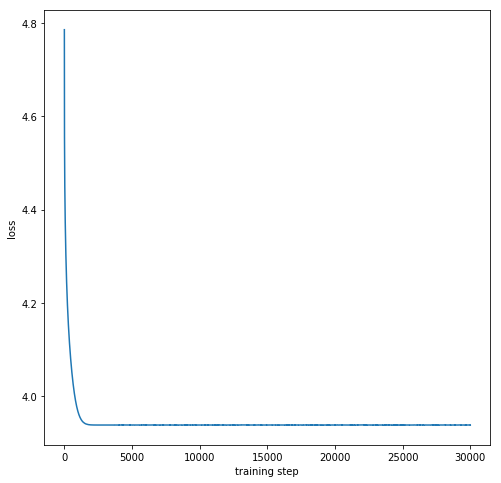

51.30311584472656

In [8]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [9]:
roughvol_model.fit(spx_rkth2[:3000])

0.08531361240615172

In [10]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00511462, 0.00553585, 0.00541006, ..., 0.00444202, 0.0052649 ,
        0.00451993],
       [0.0055017 , 0.00538037, 0.0054866 , ..., 0.00525936, 0.0045054 ,
        0.00441926],
       [0.00485876, 0.00499705, 0.00460348, ..., 0.00434201, 0.00423794,
        0.00449106],
       ...,
       [0.00658852, 0.0062045 , 0.00616514, ..., 0.00594955, 0.00726547,
        0.0068357 ],
       [0.00659277, 0.00650137, 0.0069005 , ..., 0.00743282, 0.00698454,
        0.00700189],
       [0.00679817, 0.00722052, 0.00656013, ..., 0.00710796, 0.00710804,
        0.00618106]])

In [11]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [12]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [13]:
spx_rkth2[3200:4000]

array([0.00497949, 0.00369796, 0.00427632, 0.00384846, 0.00573879,
       0.00320332, 0.00341316, 0.00367696, 0.00379485, 0.0034411 ,
       0.00365467, 0.00306469, 0.00316099, 0.00403103, 0.00320585,
       0.00418746, 0.00329531, 0.00285087, 0.00326905, 0.00347555,
       0.00236504, 0.00320398, 0.002841  , 0.00416961, 0.00238646,
       0.00310406, 0.00413374, 0.00504297, 0.00574964, 0.00395751,
       0.00486295, 0.00318418, 0.00541672, 0.00232201, 0.00424214,
       0.00353893, 0.00455296, 0.00408597, 0.0059492 , 0.00376588,
       0.00430148, 0.00298971, 0.00483563, 0.00676434, 0.00615069,
       0.00415623, 0.00425402, 0.00397209, 0.00531167, 0.00320557,
       0.00355825, 0.00426017, 0.00304454, 0.00480365, 0.00262874,
       0.00254113, 0.00333967, 0.00271842, 0.0021726 , 0.00353517,
       0.00305035, 0.00309874, 0.00313386, 0.00362518, 0.00351472,
       0.00297947, 0.00265021, 0.0035524 , 0.00267782, 0.00320592,
       0.00301757, 0.003802  , 0.00335496, 0.00286052, 0.00477

In [14]:
roughvol_result.shape,  nnet_result.shape

((801, 100), (801, 100))

In [15]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [16]:
true_result.shape

(801, 101)

In [17]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

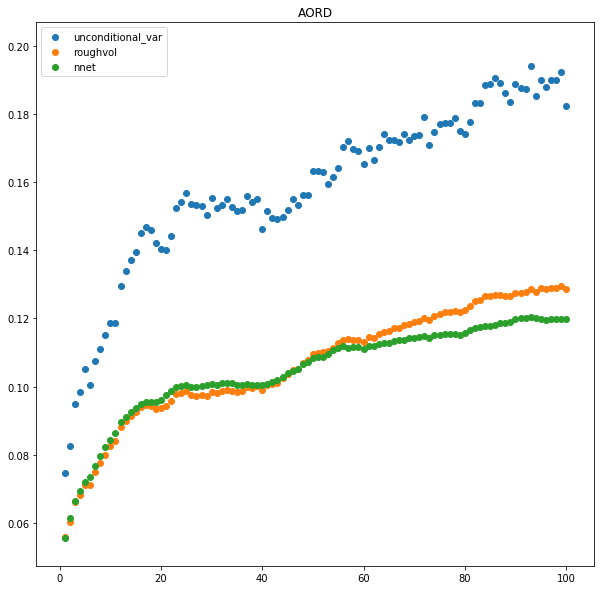

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.title("AORD")
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [19]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

array([0.05585951, 0.06003606, 0.06598666, 0.06812179, 0.07117699,
       0.07095505, 0.07495236, 0.07748745, 0.0800105 , 0.08237227,
       0.08394386, 0.08800867, 0.08982839, 0.09120762, 0.09243397,
       0.09393335, 0.09443838, 0.09418715, 0.09337821, 0.09354833,
       0.0943056 , 0.09578023, 0.09782336, 0.09807392, 0.09856481,
       0.09750635, 0.09733035, 0.09748688, 0.09728918, 0.09838426,
       0.09800659, 0.09855293, 0.09890812, 0.09866932, 0.09834061,
       0.09879961, 0.0997912 , 0.09965533, 0.10008713, 0.09905311,
       0.10049813, 0.10066801, 0.10115075, 0.10244214, 0.10361552,
       0.10470521, 0.10511528, 0.10676506, 0.10770619, 0.10956023,
       0.10983444, 0.11018818, 0.11045251, 0.11141163, 0.11265845,
       0.11379204, 0.11390478, 0.11375487, 0.11375101, 0.11310669,
       0.11444164, 0.11434927, 0.11533084, 0.11609181, 0.11625652,
       0.11710185, 0.11730067, 0.11801921, 0.11845082, 0.11882619,
       0.11926408, 0.12021256, 0.11950564, 0.12065053, 0.12121

In [20]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)

array([0.05544856, 0.06147414, 0.06644751, 0.06927463, 0.07186586,
       0.07340976, 0.07656962, 0.07969599, 0.08221857, 0.08434276,
       0.08623342, 0.08961169, 0.09098193, 0.09245885, 0.09374012,
       0.0948552 , 0.09557822, 0.09553562, 0.09535249, 0.09611239,
       0.09742764, 0.09868292, 0.09982811, 0.1001737 , 0.10055375,
       0.09976405, 0.09988589, 0.10008454, 0.10041411, 0.10072836,
       0.10058146, 0.10093049, 0.10100816, 0.10092054, 0.10038633,
       0.10037307, 0.10061602, 0.10047201, 0.10054125, 0.10035584,
       0.10079707, 0.1011776 , 0.10181648, 0.10280863, 0.10383512,
       0.10453569, 0.10507341, 0.1067088 , 0.10706087, 0.10830694,
       0.10854049, 0.10875442, 0.10953912, 0.1106295 , 0.11118796,
       0.11183239, 0.11134162, 0.11162057, 0.11154699, 0.11106749,
       0.11180468, 0.11184976, 0.11242325, 0.11269883, 0.11282018,
       0.11351298, 0.11357123, 0.11378008, 0.11411313, 0.11436555,
       0.11447111, 0.11490393, 0.11426519, 0.11516021, 0.11521